Import Libraries

In [1]:
#for giving an array 
import numpy as np
#for Data Analysis
import pandas as pd
#For drawing 2D Graphs
import matplotlib.pyplot as plt
%matplotlib inline
#For drawing 3D graph
import seaborn as sns
import scipy.stats as stats
#Splitting the data into train and test using the sklearn.model_selection libray
from sklearn.model_selection import train_test_split
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Fitting LDA to the training set  and testing set
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Fitting QDA to the training set and testing set
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Calculating the cross val score using sklearn libray
from sklearn.model_selection import cross_val_score
#Getting the accuracy and claassification report
from sklearn.metrics import  accuracy_score, classification_report,confusion_matrix
from sklearn import metrics
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
#Roc-Auc Score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

Data Pre-Processing

Reading the CSV File

In [2]:
#Reading the file
wine_data = pd.read_csv("wine.csv")
#getting top 5 rows from dataframe
wine_data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#How many rows and columns
wine_data.shape

(178, 14)

In [4]:
#Check the null values
wine_data.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [5]:
#Statistical Information
wine_data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Data Visualization

Count of Wine Column

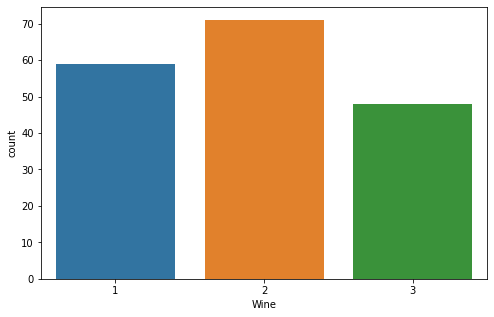

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='Wine', data=wine_data)

In [7]:
wine_data.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

Count of some columns like Alcohol, malic.acid,ash with histogram

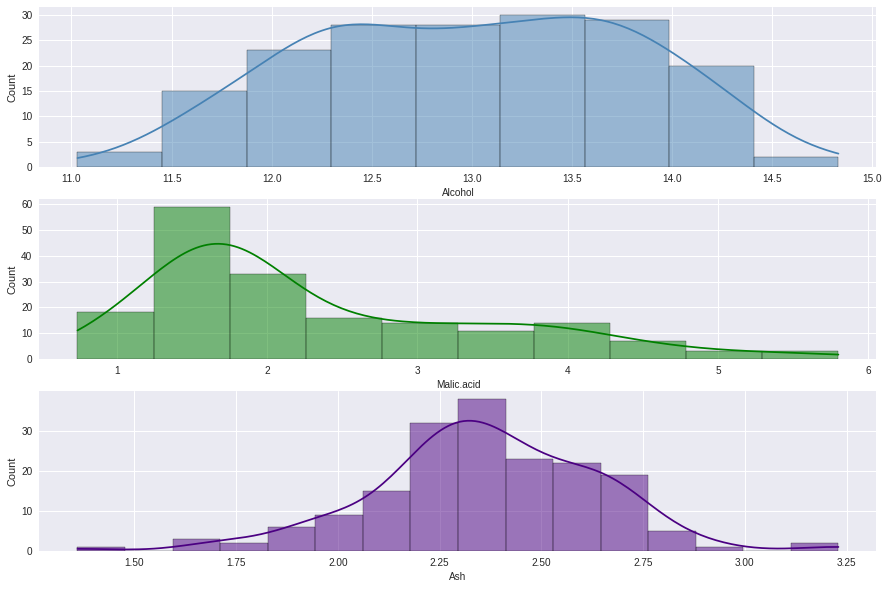

In [8]:
#Setting the subplot figure size
plt.style.use("seaborn")
fig, ax =plt.subplots(3,1, figsize=(15,10)) 
#Histplot for Alcohol
sns.histplot(x = wine_data["Alcohol"], kde=True, ax=ax[0], color="steelblue");
ax[0].set_xlabel("Alcohol",fontsize=10);
#Histplot for Malic.Acid
sns.histplot(x = wine_data["Malic.acid"], kde=True, ax=ax[1], color="green");
ax[1].set_xlabel("Malic.acid",fontsize=10);
#Histplot for Ash
sns.histplot(x = wine_data["Ash"], kde=True, ax=ax[2], color="indigo");
ax[2].set_xlabel("Ash",fontsize=10);

With above the visualization, none of the are normally distributed that means data having the outlier


In [9]:
df = wine_data.copy()

Scatter plot with wine column

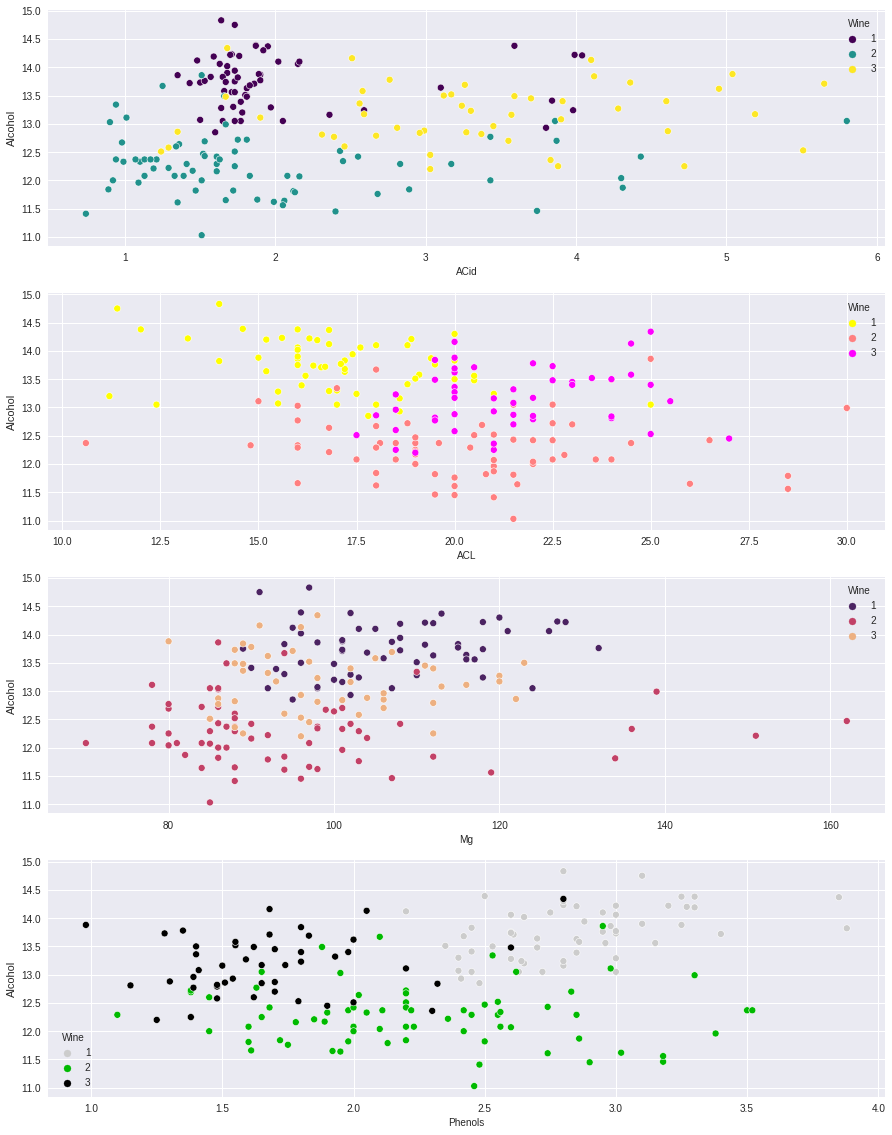

In [10]:
plt.style.use("seaborn")
fig, ax =plt.subplots(4,1, figsize=(15,20)) 
#Scatterplot for Na with RI
sns.scatterplot(x = df['Malic.acid'], y = df['Alcohol'], hue = df['Wine'], palette='viridis', legend=True, ax=ax[0])
ax[0].set_xlabel("ACid",fontsize=10);
#Scatterplot for Mg with RI
sns.scatterplot(x = df['Acl'], y = df['Alcohol'], hue = df['Wine'], palette='spring_r', legend=True, ax=ax[1])
ax[1].set_xlabel("ACL",fontsize=10);
#Scatterplot for AL with RI
sns.scatterplot(x = df['Mg'], y = df['Alcohol'], hue = df['Wine'], palette='flare_r', legend=True, ax=ax[2]);
ax[2].set_xlabel("Mg",fontsize=10);
#Scatterplot for Fe with RI
sns.scatterplot(x = df['Phenols'], y = df['Alcohol'], hue = df['Wine'], palette='nipy_spectral_r', legend=True, ax=ax[3]);
ax[3].set_xlabel("Phenols",fontsize=10);

Finding the Outlier

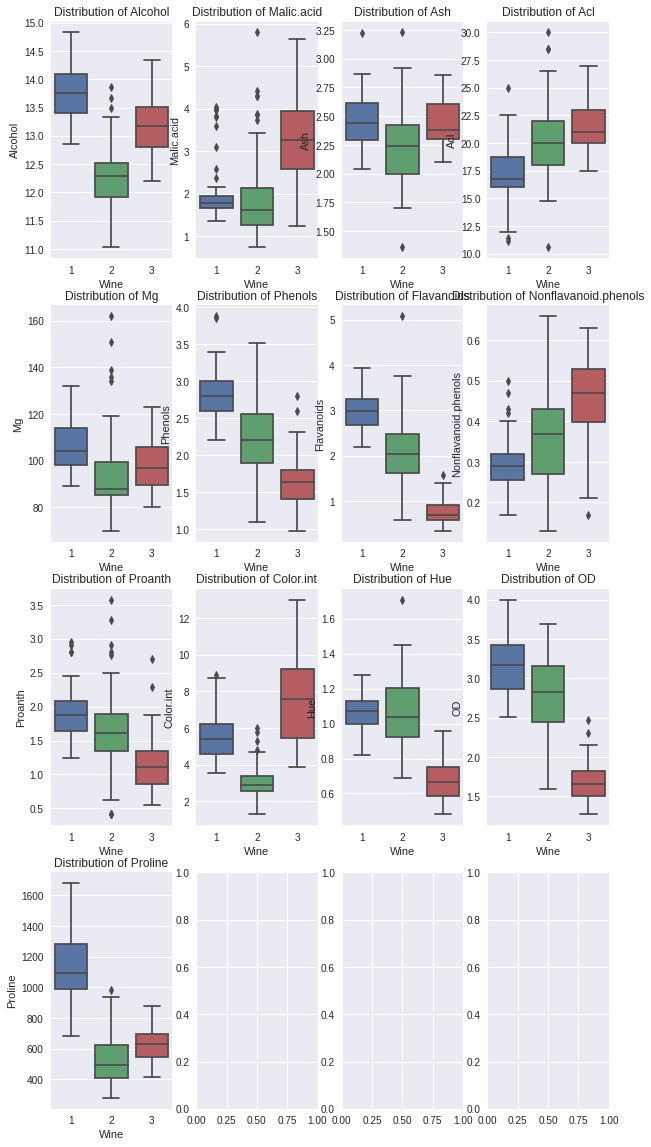

In [11]:
#Finding the outlier for each column
cols = ['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline']
plt.subplots(4,4,figsize=[10,20])
i=1
for cols in cols:
    plt.subplot(4,4,i)
    sns.boxplot(y=wine_data[cols],x=wine_data['Wine'])
    plt.title("Distribution of "+cols)
    i=i+1

Coreelation between the features

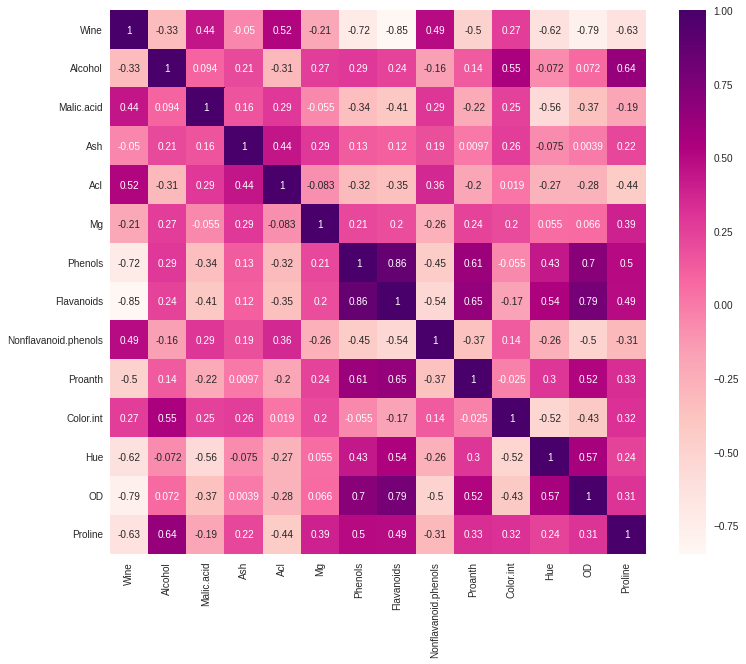

In [12]:
#Correlation between the features using the heatmap
fig, ax = plt.subplots(figsize=(12,10))
fig.patch.set_facecolor('white')
sns.heatmap(wine_data.corr(), ax=ax, annot=True, cmap="RdPu")

Spliting the data into train and test

In [13]:
#Creating the variable  x and y
x = wine_data.drop("Wine", axis=1)
y = wine_data["Wine"]

In [14]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(142, 13)
(142,)
(36, 13)
(36,)


Appling the Alogrithm

Linear Discriminant Analysis

In [16]:
#Creating the variable for Linear Discriminant Analysis object
lda = LinearDiscriminantAnalysis()
#Fit X_train and Y_train to the classifier
lda.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = lda.predict(X_test)
#Making the prediction on X_train
y_pred1 = lda.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
LDA_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("Linear Discriminat Analysis model accuracy(in %) for Training:",LDA_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
LDA_Test = metrics.accuracy_score(y_test, y_pred)*100
print("Linear Discriminat Analysis  model accuracy(in %) for Testing:", LDA_Test)

Linear Discriminat Analysis model accuracy(in %) for Training: 100.0
Linear Discriminat Analysis  model accuracy(in %) for Testing: 97.22222222222221


Cross Validation for LDA

In [17]:
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)
#Printing the results
results=cross_val_score(lda,X_train,y_train,cv = kfold)
lda_result = results.mean()*100
print("Cross Validation - Accuracy :" , lda_result)

Cross Validation - Accuracy : 97.93103448275862


Confusion Matrix, Classification Report

In [18]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Linear Discriminat Analysis :")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for Linear Discriminat Analysis :",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For Linear Discriminat Analysis :",result2)

Confusion Matrix for Linear Discriminat Analysis :
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Classification Report for Linear Discriminat Analysis :
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Overall Accuracy For Linear Discriminat Analysis : 97.22222222222221


Sensitivity, Specificity

In [19]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 97.91666666666666
Specificity:  98.48484848484848


ROC-AUC Curve

ROC-AUC for Class 1: 0.9935064935064936
ROC-AUC for Class 2: 0.99375
ROC-AUC for Class 3: 1.0


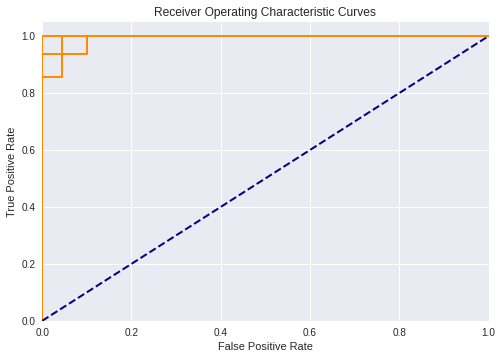

In [20]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]
#Calculate the y_score
y_score = lda.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('ROC-AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Quadratic Discriminant Analysis

In [21]:
#Creating the variable for QuadraticDiscriminantAnalysis object
QDA = QuadraticDiscriminantAnalysis()
#Fit X_train and Y_train to the classifier
QDA.fit(X_train, y_train)
#Making the prediction on X_test
y_pred2 = QDA.predict(X_test)
#Making the prediction on X_train
y_pred3 = QDA.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
QDA_Train = metrics.accuracy_score(y_train, y_pred3)*100
print("Quadratic Discriminat Analysis model accuracy(in %) for Training:",QDA_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
QDA_Test = metrics.accuracy_score(y_test, y_pred2)*100
print("Quadratic Discriminat Analysis model accuracy(in %) for Testing:", QDA_Test)

Quadratic Discriminat Analysis model accuracy(in %) for Training: 99.29577464788733
Quadratic Discriminat Analysis model accuracy(in %) for Testing: 100.0


Cross Validation

In [22]:
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)
#Printing the results
results=cross_val_score(QDA,X_train,y_train,cv = kfold)
QDA_result = results.mean()*100
print("Cross Validation - Accuracy :" , QDA_result)

Cross Validation - Accuracy : 98.57142857142858


Confusion Matrix

In [23]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Quadratic Discriminat Analysis :")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for Quadratic Discriminat Analysis :",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For Quadratic Discriminat Analysis :",result2)

Confusion Matrix for Quadratic Discriminat Analysis :
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Classification Report for Quadratic Discriminat Analysis :
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Overall Accuracy For Quadratic Discriminat Analysis : 97.22222222222221


Sensitivity, Specificity

In [24]:
FP = result3.sum(axis=0) - np.diag(result3) 
FN = result3.sum(axis=1) - np.diag(result3)
TP = np.diag(result3)
TN = result3.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result3))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 97.91666666666666
Specificity:  98.48484848484848


ROC-AUC Curve

ROC-AUC for Class 1: 1.0
ROC-AUC for Class 2: 1.0
ROC-AUC for Class 3: 1.0


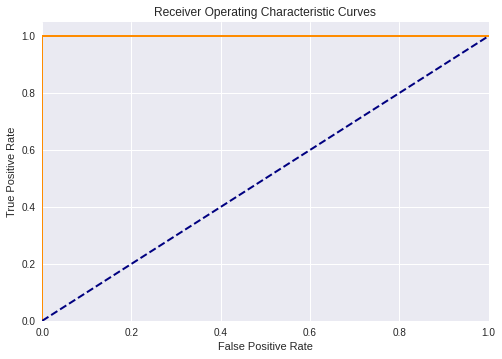

In [25]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]
#Calculate the y_score
y_score = QDA.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('ROC-AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()


Comparing the model

In [26]:
#Comparing the Model 
models =  [('Linear Discriminat Analysis', LDA_Train, LDA_Test),('Quadratic Discriminat Analysis' , QDA_Train, QDA_Test)]
predict = pd.DataFrame(data = models , columns =['Model', 'Training Accuracy', 'Testing Accuracy'])
predict

,Model,Training Accuracy,Testing Accuracy
0,Linear Discriminat Analysis,100.000000,97.222222
1,Quadratic Discriminat Analysis,99.295775,100.000000


In [27]:
#Comparing the Model with Cross Validation
models1 =  [('Linear Discriminat Analysis with Cross Validation', lda_result),('Quadratic Discriminat Analysis with Cross Validation' , QDA_result)]
predict1 = pd.DataFrame(data = models1 , columns =['Model', 'Accuracy'])
predict1

,Model,Accuracy
0,Linear Discriminat Analysis with Cross Validation,97.931034
1,Quadratic Discriminat Analysis with Cross Vali...,98.571429
